In [1]:
import itertools
from otree.api import Currency

from shorthorizon.treatment import UnitCosts, DisributionParameters

MEANS = [500, 597]
SIGMAS = [50, 100]
COSTS = [dict(rcpu=20, wcpu=7.5, scpu=5), dict(rcpu=43, wcpu=6, scpu=5)]

TREATMENT_GROUPS2 = [
    (DisributionParameters.from_args(mu=mu, sigma=sigma), UnitCosts.from_args(**costs)) 
    for mu, sigma, costs in itertools.product(MEANS, SIGMAS, COSTS)
]

In [2]:
DISTRIBUTIONS = [DisributionParameters.from_args(mu=mu, sigma=sigma) for mu, sigma in itertools.product(MEANS, SIGMAS)]

In [3]:
import scipy.stats as ss

ooq_range = {}
for i, d in enumerate(DISTRIBUTIONS):
    ooq_range[i] = []
    for cf in {1e-6, 1-1e-6}:
        ooq_range[i].append(float(d.mu + ss.norm.ppf(cf) * d.sigma))

In [4]:
ooq_range

{0: [737.6712154408543, 262.3287845588551],
 1: [975.3424308817087, 24.657569117710125],
 2: [834.6712154408543, 359.3287845588551],
 3: [1072.3424308817087, 121.65756911771012]}

(0.0, 0.012369478618162014)


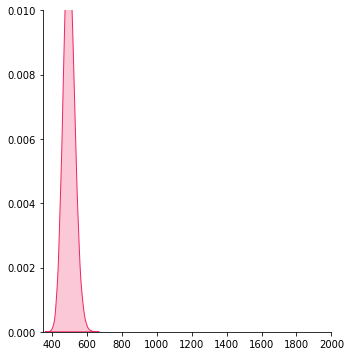

In [31]:
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from shorthorizon.treatment import sample_demand_rvs
from disruption.treatment import sample_demand_rvs

for dist in DISTRIBUTIONS:
    #mu, sigma = dist.tuple()
    #rvs = sample_demand_rvs(mu, sigma, size=int(1e5))
    mu, sigma = 6.212, 0.067
    rvs = sample_demand_rvs(mu, sigma, size=int(1e5))
    color = '#f12761' # 'orange'
    sns.displot(rvs, color=color, kind='kde', fill=True) 
    ymax = plt.gca().get_ylim()[1]
    plt.ylim(0, max(.01, min(ymax, 1)))
    plt.xlim((0,2000))
    plt.ylabel(None)
    plt.show()

    break

In [20]:
import os
os.getcwd()

'/home/gmoore3/gitrepos/my-private/Projects/utk-newsvendor-games/utk-games'

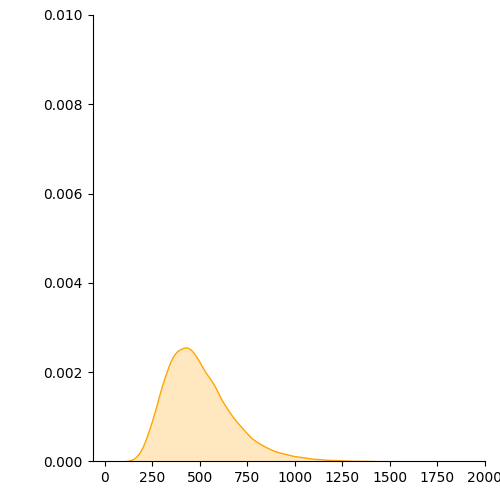

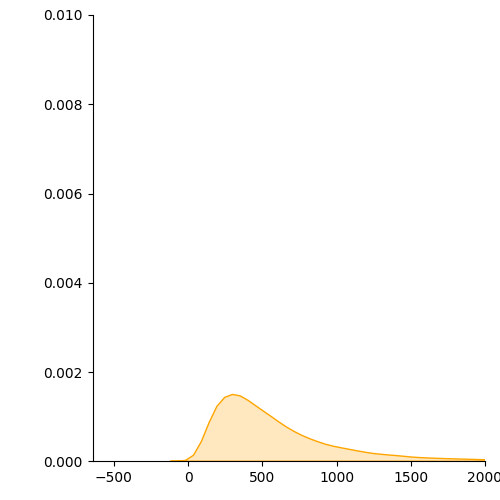

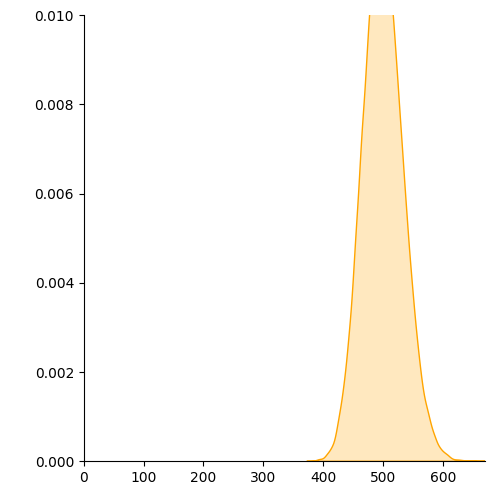

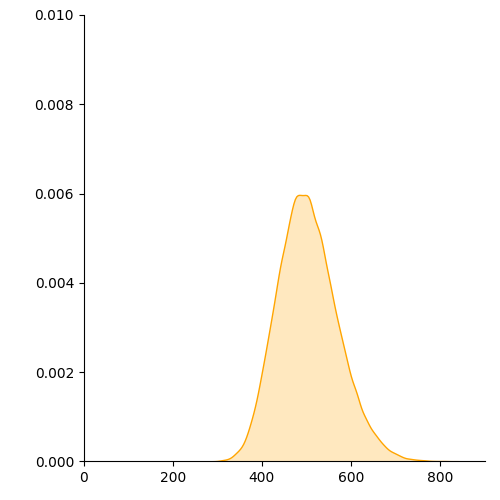

In [23]:
from IPython.display import Image, display

display(Image('_static/disruption/distribution-1.png'))
display(Image('_static/disruption/distribution-disrupt-1.png'))

display(Image('_static/disruption/distribution-3.png'))
display(Image('_static/disruption/distribution-disrupt-3.png'))


In [ ]:
from disruption.constants import VARIABILITY_CHOICES, DISRUPTION_CHOICES
from itertools import product
p = list(product(VARIABILITY_CHOICES, DISRUPTION_CHOICES))

In [ ]:
p

In [ ]:
from typing import *

In [ ]:
import inspect as i

In [ ]:
FormFieldValidator = Callable[[Any, Any], Optional[Dict[str, str]]]
def wrapper(validator: FormFieldValidator):
    return

In [ ]:
aspec = i.getfullargspec(wrapper)
aspec
t = aspec.annotations['validator']


In [ ]:
t, t.__dict__

In [ ]:
from pydantic import Field, BaseModel
from pydantic.main import Extra

class A(BaseModel):
    a: int = Field(default=1)
    b: float = 10.0
    _c: float = None

    class Config:
        extra = Extra.allow

In [ ]:
a = A(a=10,b=-3, _c=334)
a

In [ ]:
repr(a)

In [ ]:
d=dict(natural_mean=100, sigma=50)

In [ ]:
import os, re

m = re.findall(r'[a-zA-Z]', '11A')
m

In [ ]:
from otree.settings import OTREE_APPS
from otree.common import get_models_module, is_noself, get_pages_module
model_modules = {}
is_noselfs = {}
pages_modules = {}
for app in OTREE_APPS:
    model_modules.update({app: get_models_module(app)})
    pages_modules.update({app: get_pages_module(app)})
    is_noselfs.update({app: is_noself(app)})
model_modules, pages_modules, is_noselfs

In [ ]:
model_modules[0].Player, model_modules[1].Player

In [ ]:
from shorthorizon.treatment import Treatment

In [ ]:
t = Treatment(idx=0)

In [ ]:
t.idx

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


x_min = 0.0
x_max = 16.0

mean = 8.0 
std = 2.0

x = np.linspace(x_min, x_max, 100)

y = stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='coral')

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.25)

plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)

plt.xlabel('x')
plt.ylabel('Normal Distribution')

In [ ]:
help(stats.lognorm.pdf)

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


n_mu, n_sigma = 100, 50

# method of moments:
mu, sigma = np.log(n_mu**2/np.sqrt(n_sigma**2 + n_mu**2)), np.sqrt( np.log(n_sigma**2/(n_mu**2) + 1) )

y = np.random.lognormal(mu, sigma, int(1e4))
plt.hist(y, density=True, bins=100, color='coral')
plt.show()

In [ ]:
n_mu, n_sigma = 100, 50

# method of moments:
mu, sigma = np.log(n_mu**2/np.sqrt(n_sigma**2 + n_mu**2)), np.log(n_sigma**2/(n_mu**2) + 1)
x_min = 0
x_max = 300
x = np.linspace(x_min, x_max, 50)
y = stats.lognorm.pdf(x, s=sigma, loc=n_mu)
plt.plot(x,y, color='coral')

plt.grid()
plt.xlim(x_min,x_max)
# # plt.ylim(0,0.25)

plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)

plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.show()